<a href="https://colab.research.google.com/github/AndreiAf02/STAT561_Project/blob/main/STAT561_Project_Code_V5_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##STAT 561 Project - Sampling Methodologies in Improving Transfer Learning Efficiency in Diabetes Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import perf_counter



from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
# !pip install pytorch-tabnet

# from pytorch_tabnet.tab_model import TabNetClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Data taken from the UCI Machine Learning repository [here](https://doi.org/10.24432/C53919):

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)



In [4]:
data = cdc_diabetes_health_indicators.data
# data (as pandas dataframes)
X = data.features
y = data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [5]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [6]:
## Scaling the predictive data

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [7]:
data2 = pd.concat([X_scaled, y], axis=1)
data2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714,0
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000,0
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000,0
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286,0
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143,0
253676,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.75,0.0,0.000000,1.0,0.0,0.833333,0.2,0.428571,1
253677,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857,0
253678,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000,0


In [8]:
y.value_counts()

,count
Diabetes_binary,
0,218334
1,35346


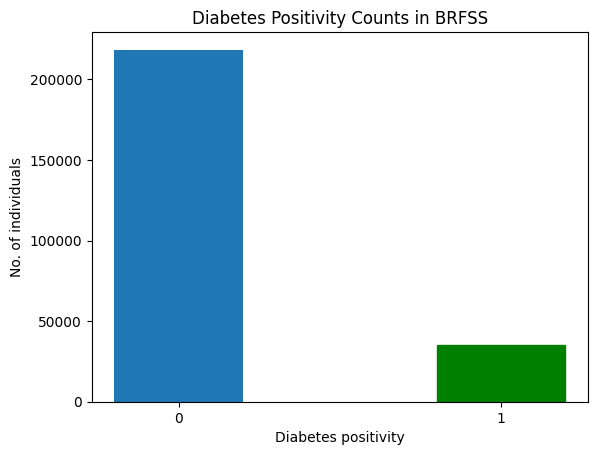

In [9]:
barlist = plt.bar([str(0),str(1)], y.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS")
plt.show()

In [12]:
X['HeartDiseaseorAttack'].value_counts()

,count
HeartDiseaseorAttack,
0,229787
1,23893


In [13]:
X_scaled[6].value_counts()

,count
6,
0.0,229787
1.0,23893


# Splitting for Source and Target Domains:


# Full Dataset:

In [101]:
np.random.seed(123)
data_T = data2.sample(frac=0.10, replace=False) ## Target domain and classification
data_S = data2.drop(data_T.index)  ## Source domain and classification

## data_S = data2[~data2[19].isin([0.0, 0.2])]  ## Source domain and classification
data_S = data_S.drop([6], axis=1)
data_S


## data_T = data2[data2[19].isin([0.0, 0.2])]  ## Target domain and classification
data_T = data_T.drop(['Diabetes_binary'], axis=1)
data_T_X = data_T.drop([6], axis=1)
data_T_y = data_T[6]
data_T_X
data_T_y
data_T = pd.concat([data_T_X, data_T_y], axis=1)
data_T


,0,1,2,3,4,5,7,8,9,10,...,12,13,14,15,16,17,18,19,20,6
11335,0.0,1.0,1.0,0.244186,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.25,0.0,0.000000,0.0,0.0,0.500000,0.8,0.857143,0.0
25704,0.0,0.0,1.0,0.139535,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.25,0.0,0.000000,0.0,1.0,0.500000,0.6,1.000000,0.0
243650,0.0,1.0,1.0,0.313953,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.50,0.0,0.000000,0.0,1.0,0.666667,0.8,0.857143,0.0
77832,1.0,0.0,1.0,0.348837,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.50,0.0,0.000000,0.0,0.0,0.666667,0.4,0.857143,0.0
158035,0.0,0.0,1.0,0.093023,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.00,0.0,0.500000,0.0,1.0,0.250000,0.8,0.857143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218723,1.0,1.0,1.0,0.174419,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.00,1.0,0.100000,1.0,1.0,1.000000,0.6,0.000000,1.0
21546,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.50,0.0,0.466667,0.0,1.0,0.416667,1.0,1.000000,0.0
111375,0.0,0.0,1.0,0.127907,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.25,0.0,0.000000,0.0,0.0,0.750000,1.0,1.000000,0.0
11899,0.0,0.0,1.0,0.139535,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.50,0.0,0.000000,0.0,1.0,0.250000,0.4,0.571429,0.0


In [102]:
data_S

,0,1,2,3,4,5,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714,0
1,0.0,0.0,0.0,0.151163,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000,0
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000,0
3,1.0,0.0,1.0,0.174419,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286,0
4,1.0,1.0,1.0,0.139535,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143,0
253676,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.75,0.0,0.000000,1.0,0.0,0.833333,0.2,0.428571,1
253677,0.0,0.0,1.0,0.186047,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857,0
253678,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000,0


In [103]:
data_T

,0,1,2,3,4,5,7,8,9,10,...,12,13,14,15,16,17,18,19,20,6
11335,0.0,1.0,1.0,0.244186,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.25,0.0,0.000000,0.0,0.0,0.500000,0.8,0.857143,0.0
25704,0.0,0.0,1.0,0.139535,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.25,0.0,0.000000,0.0,1.0,0.500000,0.6,1.000000,0.0
243650,0.0,1.0,1.0,0.313953,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.50,0.0,0.000000,0.0,1.0,0.666667,0.8,0.857143,0.0
77832,1.0,0.0,1.0,0.348837,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.50,0.0,0.000000,0.0,0.0,0.666667,0.4,0.857143,0.0
158035,0.0,0.0,1.0,0.093023,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.00,0.0,0.500000,0.0,1.0,0.250000,0.8,0.857143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218723,1.0,1.0,1.0,0.174419,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.00,1.0,0.100000,1.0,1.0,1.000000,0.6,0.000000,1.0
21546,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.50,0.0,0.466667,0.0,1.0,0.416667,1.0,1.000000,0.0
111375,0.0,0.0,1.0,0.127907,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.25,0.0,0.000000,0.0,0.0,0.750000,1.0,1.000000,0.0
11899,0.0,0.0,1.0,0.139535,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.50,0.0,0.000000,0.0,1.0,0.250000,0.4,0.571429,0.0


## Source domain and task labels:

In [104]:
X_S_full = data_S.iloc[:, :20]
X_S_full       ## Source domain


y_S_full = data_S.iloc[:, 20]
y_S_full       ## Source classification (response)

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


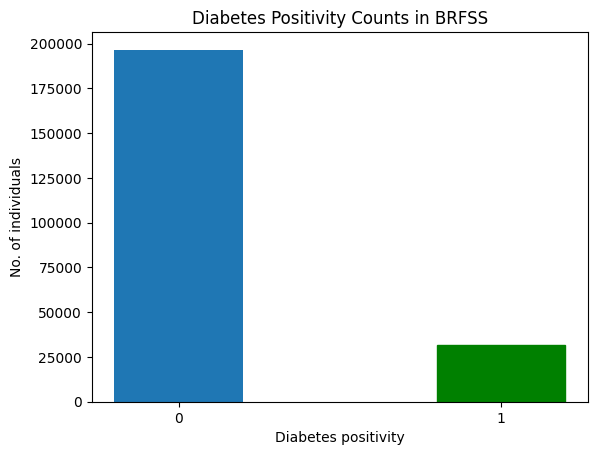

In [105]:
barlist_S = plt.bar([str(0),str(1)], y_S_full.value_counts(), width = 0.4)
barlist_S[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS")
plt.show()

## Target domain and task labels:

In [106]:
X_T_full = data_T.iloc[:, :20]
X_T_full       ## Target domain


y_T_full = data_T.iloc[:, 20]
y_T_full       ## Target classification (response)

,6
11335,0.0
25704,0.0
243650,0.0
77832,0.0
158035,0.0
...,...
218723,1.0
21546,0.0
111375,0.0
11899,0.0


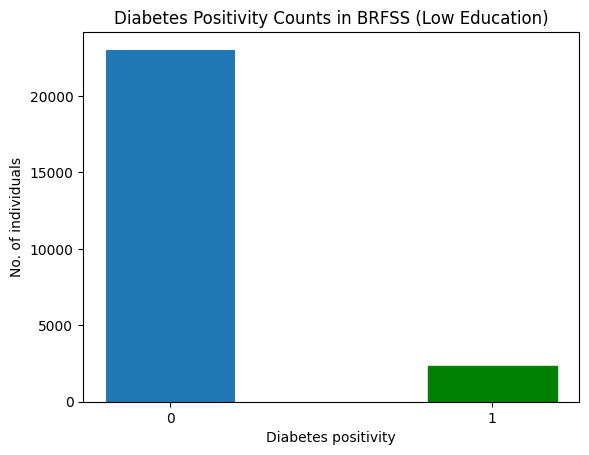

In [107]:
barlist_T = plt.bar([str(0),str(1)], y_T_full.value_counts(), width = 0.4)
barlist_T[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Low Education)")
plt.show()

## Updated Code (Modified from Shreya's code):

In [108]:
def create_dnn_model(input_shape):
  model = models.Sequential([layers.Dense(64, activation='relu', input_dim=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no diabetes)
    ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

  return model



def train_and_evaluate(model, X_train, X_test, y_train, y_test, domain):

    time_start = perf_counter()

    # Training and validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # Plot ROC curve and Confusion Matrix side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # ROC Curve
    ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax1.legend(loc='lower right')
    ax1.grid()

    # Confusion Matrix
    conf_disp.plot(ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")

    time_stop = perf_counter()

    print('Time elapsed (performance):', time_stop-time_start)


In [109]:
def Transductive_TL(model, X_test, y_test, domain):

    time_start = perf_counter()

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # Plot ROC curve and Confusion Matrix side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # ROC Curve
    ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax1.legend(loc='lower right')
    ax1.grid()

    # Confusion Matrix
    # print('Confusion matrix:', conf_matrix)
    fpr = conf_matrix[0][1]/(conf_matrix[0][0]+conf_matrix[0][1])
    tpr = 1-fpr

    fnr = conf_matrix[1][0]/(conf_matrix[1][0] + conf_matrix[1][1])
    tnr = 1 - fnr
    print('FPR', fpr, 'TPR:', tpr, 'FNR:', fnr, 'TNR:', tnr)
    conf_disp.plot(ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")
    print('False Negative Rate:', fnr)

    time_stop = perf_counter()

    print('Time elapsed (performance):', time_stop-time_start)

In [110]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_full, y_S_full, test_size=0.20, random_state=0)

In [111]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (182649, 20)
y_S_train: (182649,)
X_S_test: (45663, 20)
y_S_test: (45663,)


In [112]:
model_source = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4567/4567 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - AUC: 0.7745 - loss: 0.3435 - val_AUC: 0.8193 - val_loss: 0.3187
Epoch 2/10
4567/4567 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - AUC: 0.8200 - loss: 0.3189 - val_AUC: 0.8225 - val_loss: 0.3182
Epoch 3/10
4567/4567 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8250 - loss: 0.3148 - val_AUC: 0.8243 - val_loss: 0.3151
Epoch 4/10
4567/4567 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.8251 - loss: 0.3152 - val_AUC: 0.8265 - val_loss: 0.3134
Epoch 5/10
4567/4567 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.8266 - loss: 0.3131 - val_AUC: 0.8247 - val_loss: 0.3156
Epoch 6/10
4567/4567 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.8249 - loss: 0.3136 - val_AUC: 0.8252 - val_loss: 0.3149
Epoch 7/10
4567/4567 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - AUC: 0.8244 - loss: 0.3149 - val_AUC: 0.8248 - val_loss: 0.3194
Epoch 8/10
4567/4567 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.8263 - loss: 0.3154 - val_AUC: 0.8253 - val_loss: 0.3148
Epoch 9/10
4567/4567 ━━━━━━━━━━━

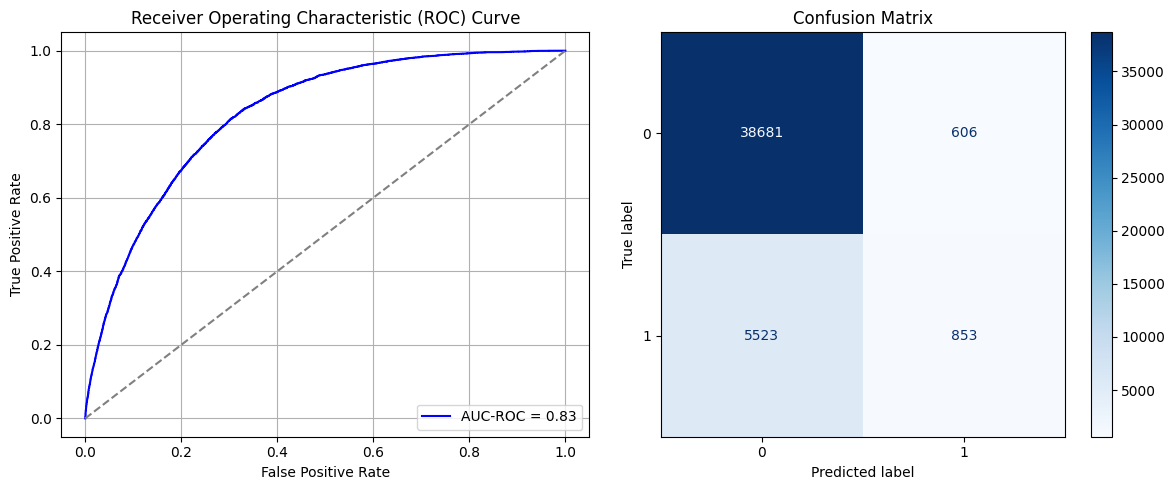

Best threshold based on F1-score: 0.22804656624794006
Time elapsed (performance): 179.93397262400003


In [113]:
train_and_evaluate(model_source, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
AUC-ROC: 0.7930516886512718
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     23022
         1.0       0.34      0.11      0.17      2346

    accuracy                           0.90     25368
   macro avg       0.63      0.55      0.56     25368
weighted avg       0.86      0.90      0.87     25368

FPR 0.022717400747111458 TPR: 0.9772825992528885 FNR: 0.8861892583120204 TNR: 0.11381074168797956


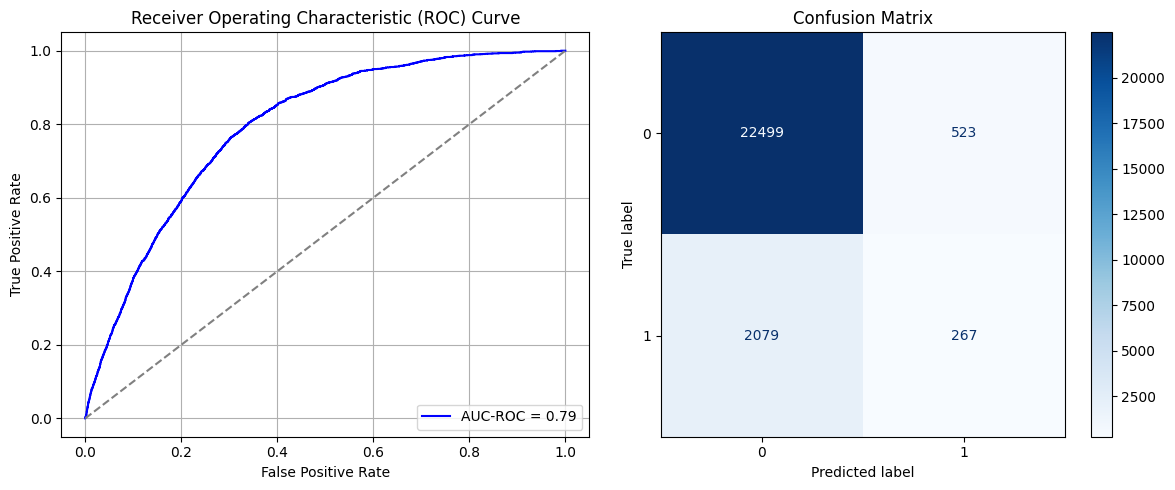

Best threshold based on F1-score: 0.7590796947479248
False Negative Rate: 0.8861892583120204
Time elapsed (performance): 3.378005261999988


<ipython-input-109-825ae471d194>:54: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [114]:
Transductive_TL(model_source, X_T_full, y_T_full, "Target")

# Random Undersampling (RUS) to balance Dataset:

## SRS Sample without Replacement:

In [115]:
data_S
data_S_majority = data_S[data_S['Diabetes_binary'].isin([0])]
data_S_minority = data_S[data_S['Diabetes_binary'].isin([1])]

undersample_size = data_S_minority['Diabetes_binary'].size
oversample_size = data_S_majority['Diabetes_binary'].size

print(undersample_size)
print(oversample_size)

31770
196542


In [116]:
np.random.seed(123)
data_S_maj_rus = data_S_majority.sample(n=undersample_size, replace=False)
# print(data_S_maj_rus)

data_S_SRS_RUS = pd.concat([data_S_maj_rus, data_S_minority])
# print(data_S_SRS_RUS)

X_S_SRS = data_S_SRS_RUS.iloc[:, :20]
X_S_SRS      ## Source domain


y_S_SRS = data_S_SRS_RUS.iloc[:, 20]
y_S_SRS       ## Source classification (response)

,Diabetes_binary
157735,0
24406,0
228127,0
239508,0
42109,0
...,...
253659,1
253668,1
253670,1
253676,1


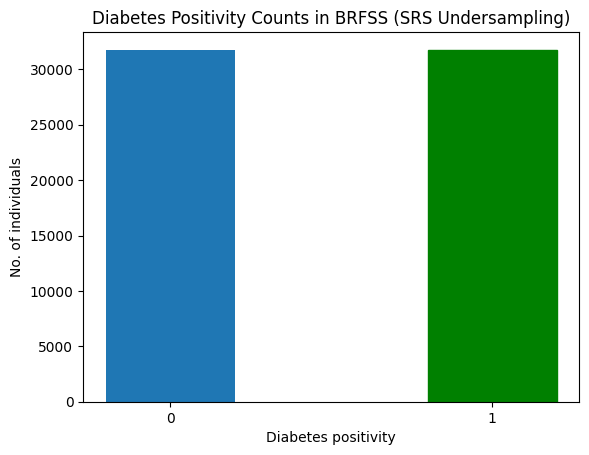

In [117]:
barlist = plt.bar([str(0),str(1)], y_S_SRS.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (SRS Undersampling)")
plt.show()

In [118]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_SRS, y_S_SRS, test_size=0.20, random_state=0)

In [119]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (50832, 20)
y_S_train: (50832,)
X_S_test: (12708, 20)
y_S_test: (12708,)


In [121]:
model_source_SRS = create_dnn_model(X_S_train.shape[1])

Epoch 1/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7766 - loss: 0.5629 - val_AUC: 0.8140 - val_loss: 0.5223
Epoch 2/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8173 - loss: 0.5179 - val_AUC: 0.8167 - val_loss: 0.5464
Epoch 3/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8214 - loss: 0.5127 - val_AUC: 0.8194 - val_loss: 0.5210
Epoch 4/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8245 - loss: 0.5086 - val_AUC: 0.8191 - val_loss: 0.5167
Epoch 5/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8272 - loss: 0.5069 - val_AUC: 0.8191 - val_loss: 0.5169
Epoch 6/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8232 - loss: 0.5109 - val_AUC: 0.8203 - val_loss: 0.5166
Epoch 7/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8286 - loss: 0.5048 - val_AUC: 0.8198 - val_loss: 0.5193
Epoch 8/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8249 - loss: 0.5079 - val_AUC: 0.8195 - val_loss: 0.5210
Epoch 9/10
1271/1271 ━━━━━━━━━━━━━━━━━━━

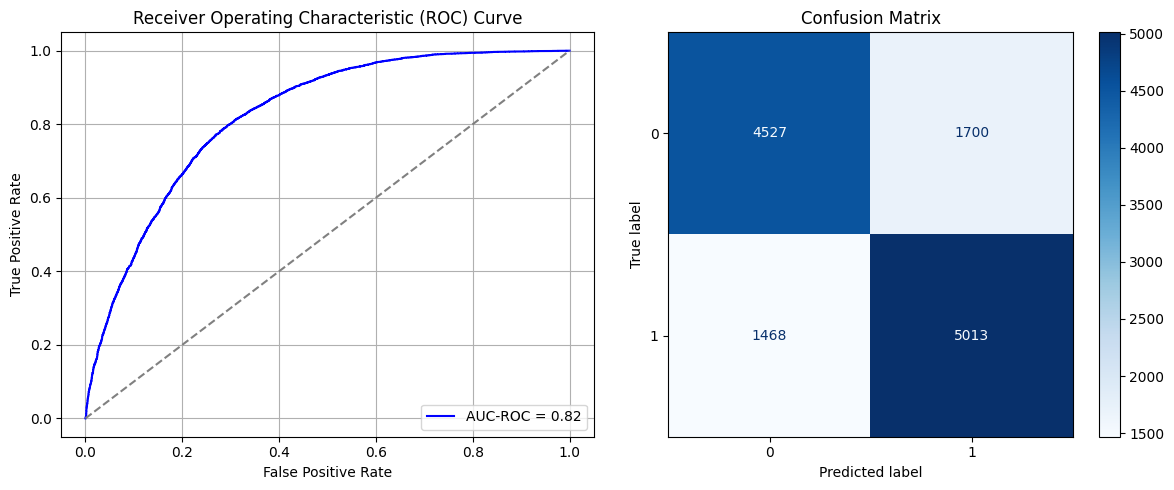

Best threshold based on F1-score: 0.32066503167152405
Time elapsed (performance): 43.733599343999686


In [122]:
train_and_evaluate(model_source_SRS, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
AUC-ROC: 0.7970445334804479
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.70      0.81     23022
         1.0       0.21      0.75      0.32      2346

    accuracy                           0.71     25368
   macro avg       0.59      0.73      0.57     25368
weighted avg       0.90      0.71      0.77     25368

FPR 0.29675962123186517 TPR: 0.7032403787681348 FNR: 0.24509803921568626 TNR: 0.7549019607843137


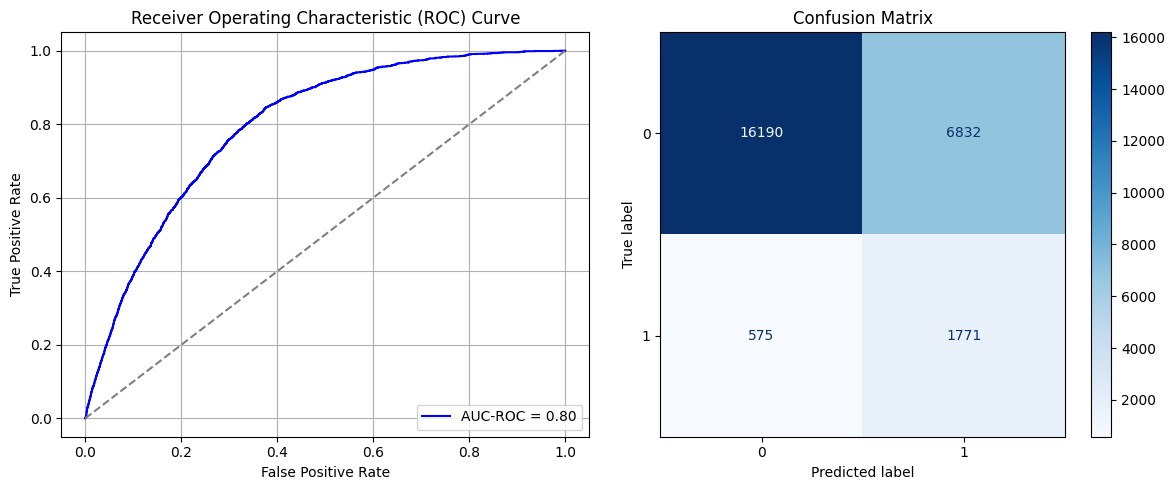

Best threshold based on F1-score: 0.9700733423233032
False Negative Rate: 0.24509803921568626
Time elapsed (performance): 3.5115191710001454


<ipython-input-109-825ae471d194>:54: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [123]:
Transductive_TL(model_source_SRS, X_T_full, y_T_full, "Target")

## Simple Random Sampling with Replacement:

In [124]:
data_S
data_S_majority = data_S[data_S['Diabetes_binary'].isin([0])]
data_S_minority = data_S[data_S['Diabetes_binary'].isin([1])]

undersample_size = data_S_minority['Diabetes_binary'].size
oversample_size = data_S_majority['Diabetes_binary'].size

print(undersample_size)
print(oversample_size)

31770
196542


In [125]:
np.random.seed(123)
data_S_maj_rus = data_S_majority.sample(n=undersample_size, replace=True)
# print(data_S_maj_rus)

data_S_SRSwR_RUS = pd.concat([data_S_maj_rus, data_S_minority])
# print(data_S_SRS_RUS)

X_S_SRSwR = data_S_SRSwR_RUS.iloc[:, :20]
X_S_SRSwR      ## Source domain


y_S_SRSwR = data_S_SRSwR_RUS.iloc[:, 20]
y_S_SRSwR       ## Source classification (response)

,Diabetes_binary
20522,0
35972,0
23014,0
248173,0
154228,0
...,...
253659,1
253668,1
253670,1
253676,1


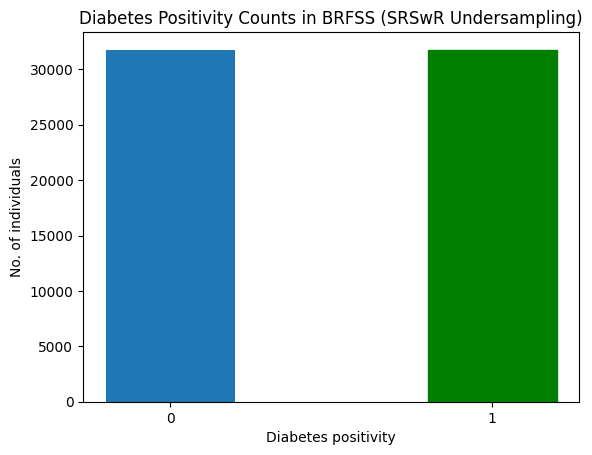

In [126]:
barlist = plt.bar([str(0),str(1)], y_S_SRSwR.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (SRSwR Undersampling)")
plt.show()

In [127]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_SRSwR, y_S_SRSwR, test_size=0.20, random_state=0)

In [128]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (50832, 20)
y_S_train: (50832,)
X_S_test: (12708, 20)
y_S_test: (12708,)


In [129]:
model_source_SRSwR = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7891 - loss: 0.5526 - val_AUC: 0.8177 - val_loss: 0.5200
Epoch 2/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8188 - loss: 0.5140 - val_AUC: 0.8219 - val_loss: 0.5153
Epoch 3/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.8250 - loss: 0.5081 - val_AUC: 0.8218 - val_loss: 0.5143
Epoch 4/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.5091 - val_AUC: 0.8232 - val_loss: 0.5128
Epoch 5/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.5082 - val_AUC: 0.8241 - val_loss: 0.5118
Epoch 6/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8286 - loss: 0.5030 - val_AUC: 0.8231 - val_loss: 0.5131
Epoch 7/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8279 - loss: 0.5041 - val_AUC: 0.8243 - val_loss: 0.5124
Epoch 8/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8294 - loss: 0.5026 - val_AUC: 0.8258 - val_loss: 0.5107
Epoch 9/10
1271/1271 ━━━━━━━━━━━━━━━━━━━

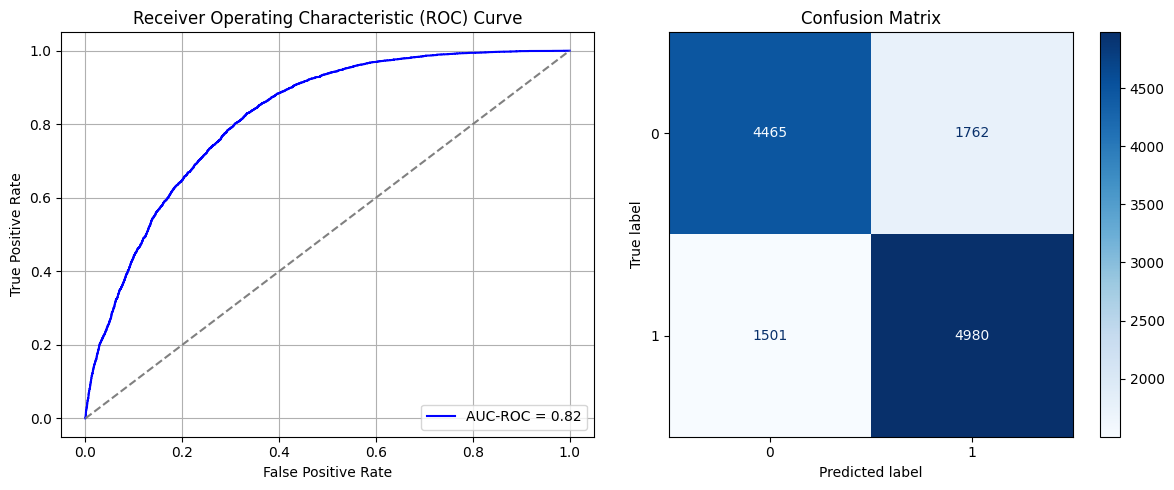

Best threshold based on F1-score: 0.9630052447319031
Time elapsed (performance): 38.69879833199957


<ipython-input-108-465a6d5efe72>:62: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [130]:
train_and_evaluate(model_source_SRSwR, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
AUC-ROC: 0.7870665780750286
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     23022
         1.0       0.20      0.74      0.31      2346

    accuracy                           0.70     25368
   macro avg       0.58      0.72      0.56     25368
weighted avg       0.89      0.70      0.76     25368

FPR 0.30357918512726956 TPR: 0.6964208148727304 FNR: 0.25788576300085253 TNR: 0.7421142369991475


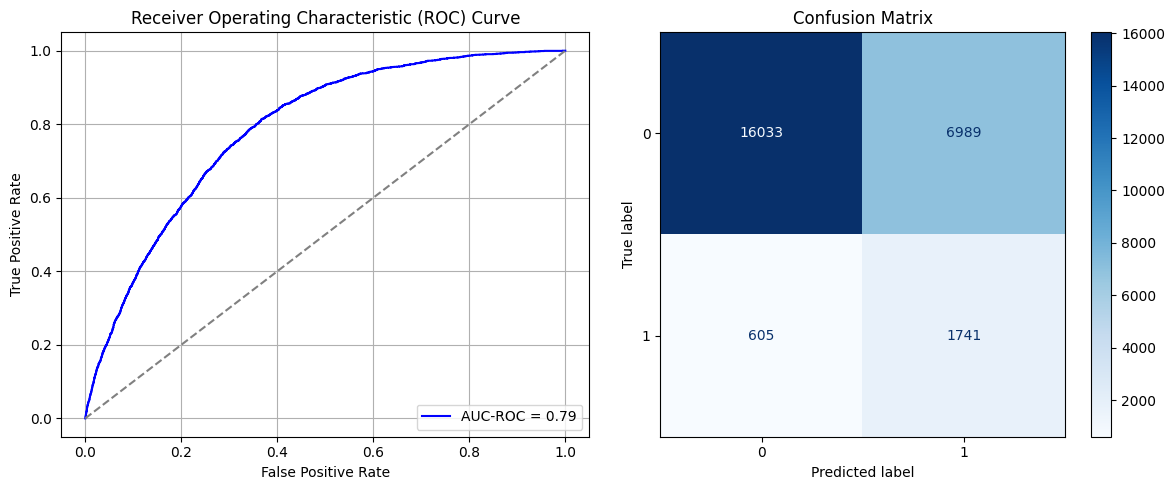

Best threshold based on F1-score: 0.6733965277671814
False Negative Rate: 0.25788576300085253
Time elapsed (performance): 3.252000532999773


In [131]:
Transductive_TL(model_source_SRSwR, X_T_full, y_T_full, "Target")

## Systematic Sampling:

First, we select a single systematic sample from the majority class, in which $k = \frac{N_0}{N_1}$, where $N_0$ is the majority class size in the source domain and $N_1$ is the minority class in the source domain.

In [132]:
import random

k = oversample_size/undersample_size
print(k)

np.random.seed(123)
start = random.randint(1, int(k))
print(start)


6.186402266288952
6


In [133]:
data_S_majority.iloc[[1]]

,0,1,2,3,4,5,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
1,0.0,0.0,0.0,0.151163,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.5,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0


In [134]:
Row = []

for i in range(undersample_size):
  row = start+int(k*i)-1
  Row.append(row)

print(Row)

data_S_maj_rus = pd.DataFrame()
data_S_maj_rus = data_S_majority.iloc[Row]

data_S_maj_rus


[5, 11, 17, 23, 29, 35, 42, 48, 54, 60, 66, 73, 79, 85, 91, 97, 103, 110, 116, 122, 128, 134, 141, 147, 153, 159, 165, 172, 178, 184, 190, 196, 202, 209, 215, 221, 227, 233, 240, 246, 252, 258, 264, 271, 277, 283, 289, 295, 301, 308, 314, 320, 326, 332, 339, 345, 351, 357, 363, 369, 376, 382, 388, 394, 400, 407, 413, 419, 425, 431, 438, 444, 450, 456, 462, 468, 475, 481, 487, 493, 499, 506, 512, 518, 524, 530, 537, 543, 549, 555, 561, 567, 574, 580, 586, 592, 598, 605, 611, 617, 623, 629, 636, 642, 648, 654, 660, 666, 673, 679, 685, 691, 697, 704, 710, 716, 722, 728, 734, 741, 747, 753, 759, 765, 772, 778, 784, 790, 796, 803, 809, 815, 821, 827, 833, 840, 846, 852, 858, 864, 871, 877, 883, 889, 895, 902, 908, 914, 920, 926, 932, 939, 945, 951, 957, 963, 970, 976, 982, 988, 994, 1001, 1007, 1013, 1019, 1025, 1031, 1038, 1044, 1050, 1056, 1062, 1069, 1075, 1081, 1087, 1093, 1099, 1106, 1112, 1118, 1124, 1130, 1137, 1143, 1149, 1155, 1161, 1168, 1174, 1180, 1186, 1192, 1198, 1205, 1211, 1

,0,1,2,3,4,5,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
5,1.0,1.0,1.0,0.151163,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.25,0.000000,0.066667,0.0,1.0,0.750000,1.0,1.000000,0
15,1.0,0.0,1.0,0.244186,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.25,0.166667,0.000000,0.0,0.0,0.416667,1.0,1.000000,0
24,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.50,0.200000,0.000000,1.0,0.0,0.666667,0.6,0.714286,0
36,1.0,1.0,1.0,0.139535,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.50,0.166667,0.100000,1.0,1.0,0.583333,0.6,0.285714,0
44,0.0,1.0,1.0,0.220930,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.25,0.000000,0.000000,0.0,0.0,0.583333,0.8,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253646,0.0,0.0,1.0,0.267442,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.50,0.133333,0.000000,0.0,0.0,0.083333,0.6,0.000000,0
253653,0.0,0.0,1.0,0.244186,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.75,0.000000,0.500000,0.0,1.0,0.750000,1.0,0.285714,0
253661,1.0,0.0,1.0,0.244186,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.50,0.000000,0.066667,1.0,0.0,0.416667,1.0,0.714286,0
253669,0.0,1.0,1.0,0.174419,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.00,0.000000,0.100000,0.0,1.0,0.416667,0.2,0.428571,0


In [135]:
data_S_Sy_RUS = pd.concat([data_S_maj_rus, data_S_minority])
# print(data_S_SRS_RUS)

X_S_Sy = data_S_Sy_RUS.iloc[:, :20]
X_S_Sy      ## Source domain


y_S_Sy = data_S_Sy_RUS.iloc[:, 20]
y_S_Sy       ## Source classification (response)

,Diabetes_binary
5,0
15,0
24,0
36,0
44,0
...,...
253659,1
253668,1
253670,1
253676,1


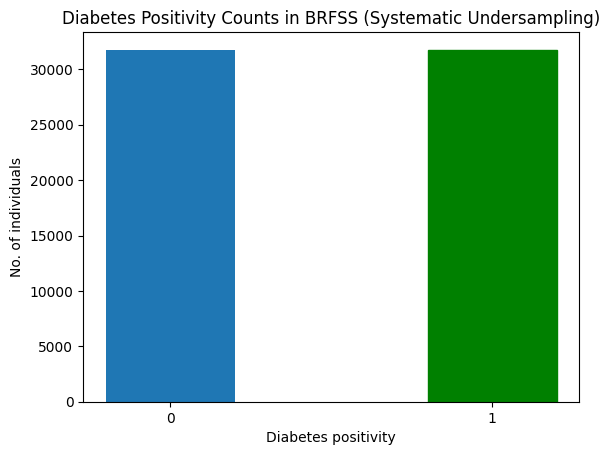

In [136]:
barlist = plt.bar([str(0),str(1)], y_S_Sy.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Systematic Undersampling)")
plt.show()

In [137]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_Sy, y_S_Sy, test_size=0.20, random_state=0)

In [138]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (50832, 20)
y_S_train: (50832,)
X_S_test: (12708, 20)
y_S_test: (12708,)


In [139]:
model_source_Sy = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7754 - loss: 0.5667 - val_AUC: 0.8180 - val_loss: 0.5205
Epoch 2/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8133 - loss: 0.5207 - val_AUC: 0.8208 - val_loss: 0.5210
Epoch 3/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8233 - loss: 0.5092 - val_AUC: 0.8213 - val_loss: 0.5164
Epoch 4/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8197 - loss: 0.5137 - val_AUC: 0.8228 - val_loss: 0.5163
Epoch 5/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.5088 - val_AUC: 0.8236 - val_loss: 0.5135
Epoch 6/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.5112 - val_AUC: 0.8239 - val_loss: 0.5201
Epoch 7/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8214 - loss: 0.5116 - val_AUC: 0.8233 - val_loss: 0.5216
Epoch 8/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8237 - loss: 0.5092 - val_AUC: 0.8237 - val_loss: 0.5145
Epoch 9/10
1271/1271 ━━━━━━━━━━━━━━━━━━━

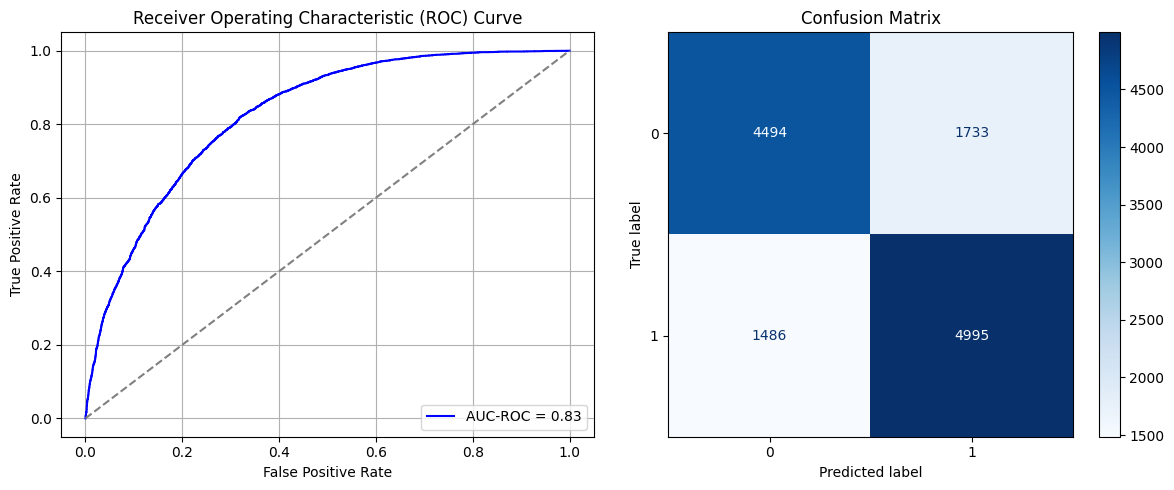

Best threshold based on F1-score: 0.3434261083602905
Time elapsed (performance): 43.14819852300025


In [140]:
train_and_evaluate(model_source_Sy, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
AUC-ROC: 0.8010889061747009
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.70      0.81     23022
         1.0       0.21      0.77      0.33      2346

    accuracy                           0.71     25368
   macro avg       0.59      0.73      0.57     25368
weighted avg       0.90      0.71      0.77     25368

FPR 0.2986273998783772 TPR: 0.7013726001216227 FNR: 0.2318840579710145 TNR: 0.7681159420289855


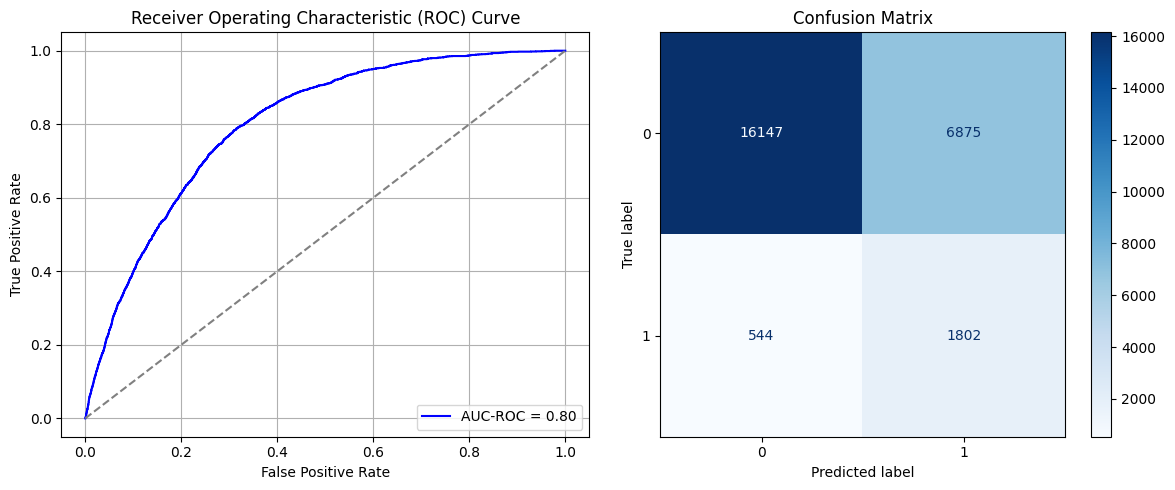

Best threshold based on F1-score: 0.6694064736366272
False Negative Rate: 0.2318840579710145
Time elapsed (performance): 2.3687944550001703


In [141]:
Transductive_TL(model_source_Sy, X_T_full, y_T_full, "Target")

## Systematic Sampling (multiple samples):

Now, we investigate the possibility of conducting $m$ systematic samples, each with a sampling interval of $k=m*\frac{N_0}{N_1}$, and obtaining the undersampled majority class data using all $m$ systematic samples combined. This may more closely approximate SRS sampling.

For convenience, we take $m=10$ in this case.

In [142]:
import random

m = 10

k = oversample_size/undersample_size * m
print(k)

np.random.seed(123)
start = random.sample(range(1, int(k)), 10)
# random.randint(1, int(k))
print(start)

61.86402266288952
[35, 45, 14, 56, 2, 22, 12, 43, 11, 17]


In [143]:
Row = []

for j in range(len(start)):
  for i in range(int(undersample_size/m)):
    row = start[j]+int(k*i)-1
    Row.append(row)

# print(Row)

data_S_maj_rus = pd.DataFrame()
data_S_maj_rus = data_S_majority.iloc[Row]

data_S_maj_rus

,0,1,2,3,4,5,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
51,1.0,0.0,1.0,0.116279,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.50,0.000000,0.000000,0.0,0.0,0.500000,0.4,0.285714,0
135,0.0,1.0,1.0,0.116279,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.75,0.333333,0.500000,0.0,0.0,0.833333,0.6,0.571429,0
220,0.0,0.0,1.0,0.116279,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.25,0.000000,0.000000,0.0,0.0,0.083333,0.6,0.571429,0
302,0.0,1.0,1.0,0.151163,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.75,0.333333,0.000000,0.0,0.0,1.000000,0.6,0.428571,0
399,0.0,0.0,1.0,0.220930,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.50,0.166667,0.333333,0.0,0.0,0.583333,1.0,0.571429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253308,0.0,0.0,1.0,0.244186,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.50,0.000000,0.000000,0.0,0.0,0.000000,0.8,0.000000,0
253388,1.0,0.0,1.0,0.197674,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.75,0.000000,0.466667,0.0,1.0,0.416667,0.6,0.000000,0
253470,0.0,0.0,1.0,0.127907,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.50,0.033333,0.000000,0.0,0.0,0.333333,0.6,0.000000,0
253544,1.0,1.0,1.0,0.093023,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.75,0.000000,0.133333,0.0,0.0,0.666667,0.8,0.142857,0


In [144]:
data_S_Sy_RUS = pd.concat([data_S_maj_rus, data_S_minority])
# print(data_S_SRS_RUS)

X_S_Sy = data_S_Sy_RUS.iloc[:, :20]
X_S_Sy      ## Source domain


y_S_Sy = data_S_Sy_RUS.iloc[:, 20]
y_S_Sy       ## Source classification (response)

,Diabetes_binary
51,0
135,0
220,0
302,0
399,0
...,...
253659,1
253668,1
253670,1
253676,1


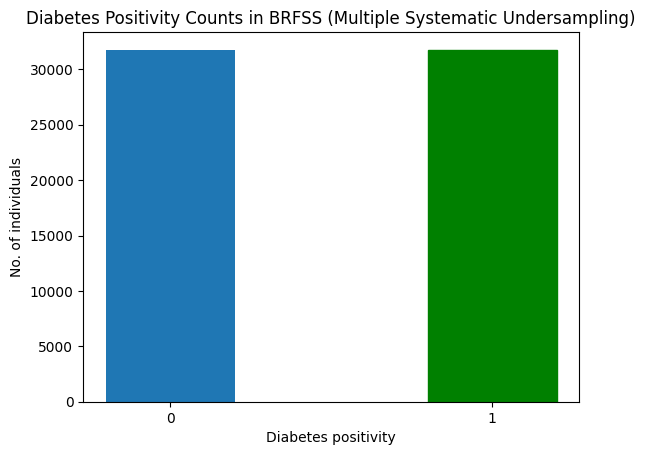

In [145]:
barlist = plt.bar([str(0),str(1)], y_S_Sy.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Multiple Systematic Undersampling)")
plt.show()

In [146]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_Sy, y_S_Sy, test_size=0.20, random_state=0)

In [147]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (50832, 20)
y_S_train: (50832,)
X_S_test: (12708, 20)
y_S_test: (12708,)


In [148]:
model_source_Sy = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7735 - loss: 0.5647 - val_AUC: 0.8202 - val_loss: 0.5206
Epoch 2/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8148 - loss: 0.5197 - val_AUC: 0.8229 - val_loss: 0.5164
Epoch 3/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8179 - loss: 0.5167 - val_AUC: 0.8244 - val_loss: 0.5124
Epoch 4/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8204 - loss: 0.5127 - val_AUC: 0.8241 - val_loss: 0.5130
Epoch 5/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8167 - loss: 0.5161 - val_AUC: 0.8256 - val_loss: 0.5123
Epoch 6/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8244 - loss: 0.5076 - val_AUC: 0.8253 - val_loss: 0.5106
Epoch 7/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8205 - loss: 0.5124 - val_AUC: 0.8253 - val_loss: 0.5219
Epoch 8/10
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8225 - loss: 0.5102 - val_AUC: 0.8276 - val_loss: 0.5100
Epoch 9/10
1271/1271 ━━━━━━━━━━━━━━━━━━━

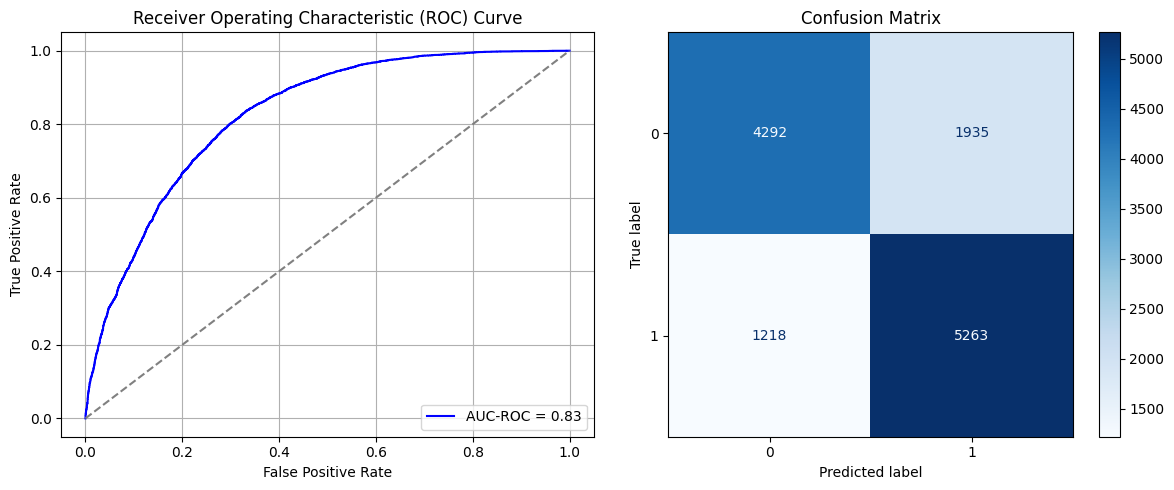

Best threshold based on F1-score: 0.3752855360507965
Time elapsed (performance): 47.5954950790001


In [149]:
train_and_evaluate(model_source_Sy, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
AUC-ROC: 0.8048514864354145
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.66      0.79     23022
         1.0       0.20      0.81      0.31      2346

    accuracy                           0.67     25368
   macro avg       0.58      0.74      0.55     25368
weighted avg       0.90      0.67      0.74     25368

FPR 0.3403266440795761 TPR: 0.659673355920424 FNR: 0.1888320545609548 TNR: 0.8111679454390452


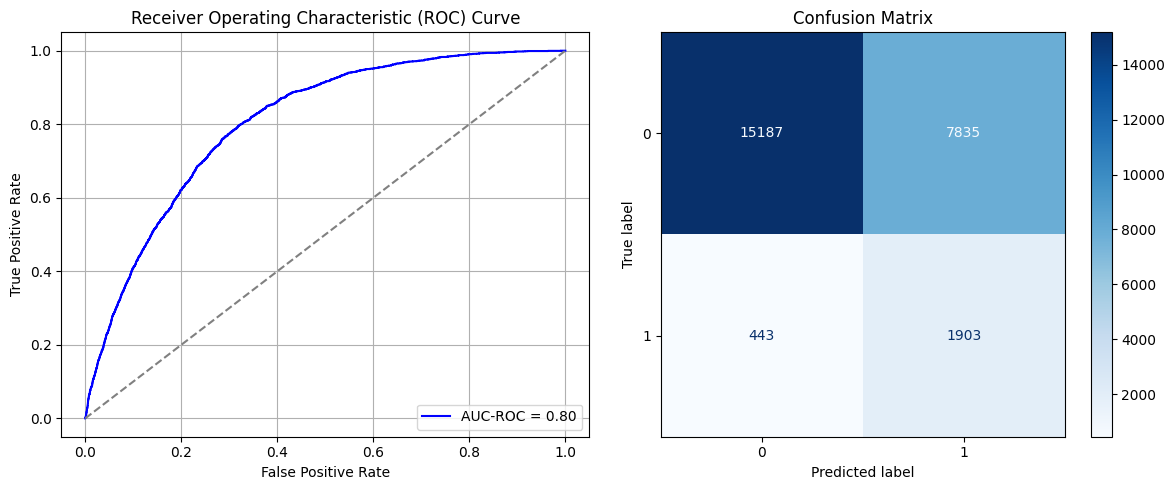

Best threshold based on F1-score: 0.9705865383148193
False Negative Rate: 0.1888320545609548
Time elapsed (performance): 1.9247252340001069


<ipython-input-109-825ae471d194>:54: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [150]:
Transductive_TL(model_source_Sy, X_T_full, y_T_full, "Target")

# Random Oversampling (ROS):

## Simple Random Sampling with Replacement:

In this case, we investigate the effectiveness of Random Oversampling methods, beginning with Simple Random Sampling (SRS) with replacement. For this, we perform random resampling from the minority class of size $N_1$ to generate an additional sample of size $N_0-N_1$, such that the oversampled minority class will have the same size as the majority class.

In [151]:
data_S
data_S_majority = data_S[data_S['Diabetes_binary'].isin([0])]
data_S_minority = data_S[data_S['Diabetes_binary'].isin([1])]

undersample_size = data_S_minority['Diabetes_binary'].size
oversample_size = data_S_majority['Diabetes_binary'].size

print(undersample_size)
print(oversample_size)

31770
196542


In [152]:
np.random.seed(123)
data_S_min_ros = data_S_minority.sample(n=oversample_size - undersample_size, replace=True)
# print(data_S_min_ros)

data_S_SRS_ROS = pd.concat([data_S_majority, data_S_min_ros, data_S_minority])
# print(data_S_SRS_ROS)

X_S_SRS = data_S_SRS_ROS.iloc[:, :20]
X_S_SRS      ## Source domain


y_S_SRS = data_S_SRS_ROS.iloc[:, 20]
y_S_SRS       ## Source classification (response)

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253659,1
253668,1
253670,1
253676,1


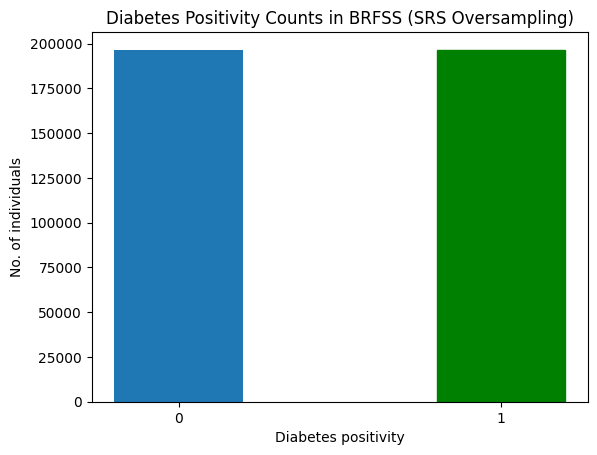

In [153]:
barlist = plt.bar([str(0),str(1)], y_S_SRS.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (SRS Oversampling)")
plt.show()

In [154]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_SRS, y_S_SRS, test_size=0.20, random_state=0)

In [155]:
model_source_SRS_ROS = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7862/7862 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.8077 - loss: 0.5289 - val_AUC: 0.8281 - val_loss: 0.5100
Epoch 2/10
7862/7862 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8253 - loss: 0.5075 - val_AUC: 0.8287 - val_loss: 0.5051
Epoch 3/10
7862/7862 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.8281 - loss: 0.5039 - val_AUC: 0.8296 - val_loss: 0.5030
Epoch 4/10
7862/7862 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.8285 - loss: 0.5032 - val_AUC: 0.8307 - val_loss: 0.5035
Epoch 5/10
7862/7862 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - AUC: 0.8295 - loss: 0.5019 - val_AUC: 0.8313 - val_loss: 0.5005
Epoch 6/10
7862/7862 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - AUC: 0.8305 - loss: 0.5006 - val_AUC: 0.8316 - val_loss: 0.5009
Epoch 7/10
7862/7862 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.8309 - loss: 0.4999 - val_AUC: 0.8314 - val_loss: 0.5001
Epoch 8/10
7862/7862 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - AUC: 0.8313 - loss: 0.4994 - val_AUC: 0.8320 - val_loss: 0.5004
Epoch 9/10
7862/7862 ━━━━━━━━━━━

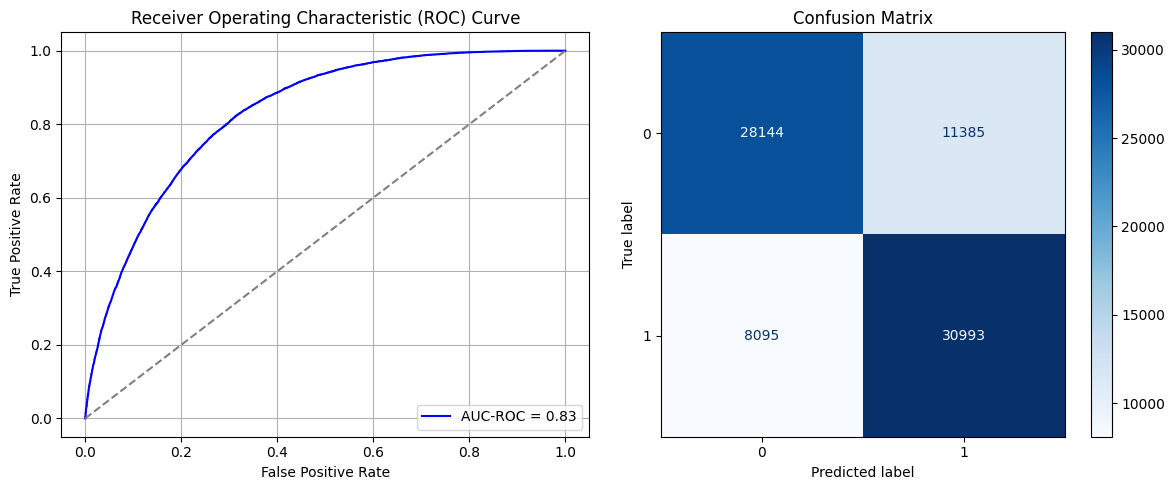

Best threshold based on F1-score: 0.39544495940208435
Time elapsed (performance): 201.72491686000012


In [156]:
train_and_evaluate(model_source_SRS_ROS, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

793/793 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
AUC-ROC: 0.7969496614787753
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81     23022
         1.0       0.20      0.78      0.32      2346

    accuracy                           0.70     25368
   macro avg       0.59      0.73      0.56     25368
weighted avg       0.90      0.70      0.76     25368

FPR 0.3110502997133177 TPR: 0.6889497002866822 FNR: 0.22208013640238705 TNR: 0.777919863597613


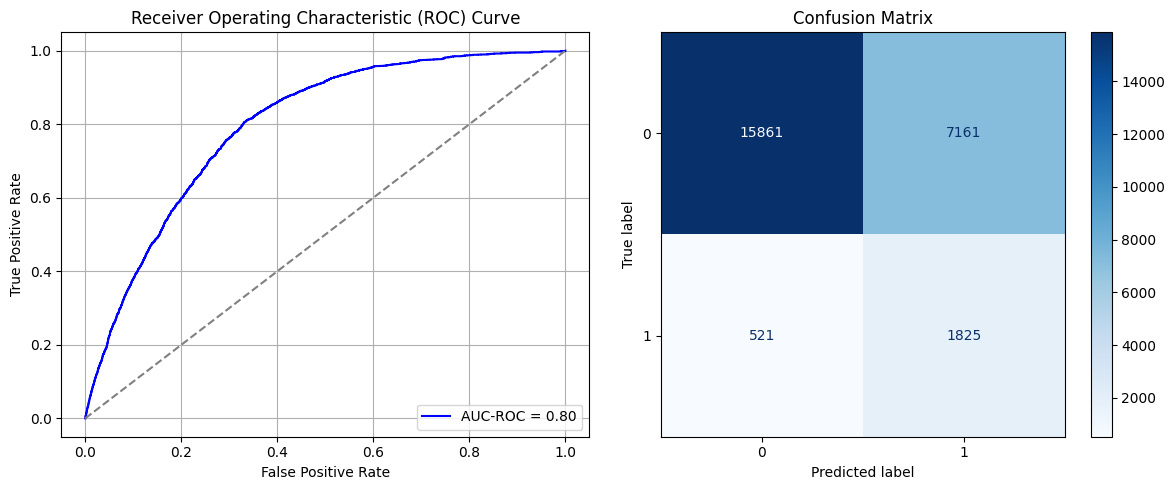

Best threshold based on F1-score: 0.6583528518676758
False Negative Rate: 0.22208013640238705
Time elapsed (performance): 9.401590884000143


In [157]:
Transductive_TL(model_source_SRS_ROS, X_T_full, y_T_full, "Target")

## Systematic Resampling:

In this case, we examine the possibility of performing Random Oversampling on the minority class using systematic sampling. For this purpose, taking a sampling interval of $k$, we would compile a total of $k*\frac{N_0-N_1}{N_1}$ systematic samples from the minority class in order to balance the dataset. We sample the starting point from 1 to $k$ *with replacement*, since a highly imbalanced dataset will require sampling with replacement in order to achieve a balanced dataset.

In particular, taking $k=48$ yields a number of samples of $k*\frac{N_0-N_1}{N_1}=254.986 \approx 255$, so we take $k=48$.

In [159]:
import random

k = 48

Nsamples = k*(oversample_size-undersample_size)/undersample_size
# print(Nsamples)

np.random.seed(123)
start = np.random.choice(int(k), int(Nsamples), replace=True)
# print(start)


Row = []

for j in range(len(start)):
  for i in range(int(undersample_size/k)):
    row = start[j]+int(k*i)-1
    Row.append(row)

# print(Row)

data_S_min_ros = pd.DataFrame()
data_S_min_ros = data_S_minority.iloc[Row]

data_S_Sy_ROS = pd.concat([data_S_majority, data_S_min_ros, data_S_minority])
# print(data_S_SRS_ROS)

X_S_Sy = data_S_Sy_ROS.iloc[:, :20]
X_S_Sy      ## Source domain


y_S_Sy = data_S_Sy_ROS.iloc[:, 20]
y_S_Sy       ## Source classification (response)




,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253659,1
253668,1
253670,1
253676,1


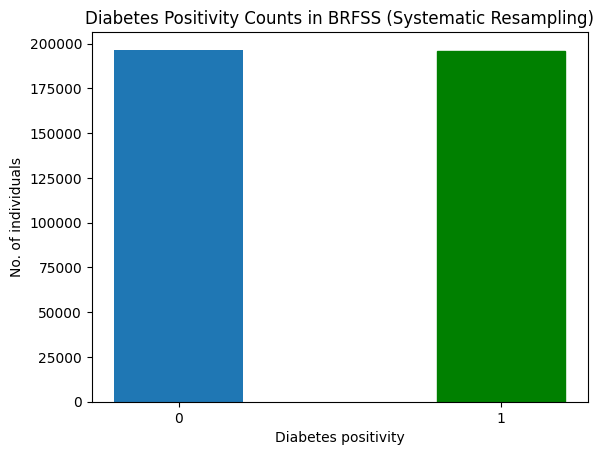

In [160]:
barlist = plt.bar([str(0),str(1)], y_S_Sy.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Systematic Resampling)")
plt.show()

In [161]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_Sy, y_S_Sy, test_size=0.20, random_state=0)

In [162]:
model_source_Sy_ROS = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7845/7845 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8086 - loss: 0.5277 - val_AUC: 0.8262 - val_loss: 0.5078
Epoch 2/10
7845/7845 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - AUC: 0.8252 - loss: 0.5076 - val_AUC: 0.8278 - val_loss: 0.5110
Epoch 3/10
7845/7845 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.8278 - loss: 0.5045 - val_AUC: 0.8295 - val_loss: 0.5053
Epoch 4/10
7845/7845 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - AUC: 0.8287 - loss: 0.5024 - val_AUC: 0.8296 - val_loss: 0.5041
Epoch 5/10
7845/7845 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.8313 - loss: 0.4998 - val_AUC: 0.8308 - val_loss: 0.5030
Epoch 6/10
7845/7845 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.8285 - loss: 0.5027 - val_AUC: 0.8305 - val_loss: 0.5017
Epoch 7/10
7845/7845 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.8317 - loss: 0.4989 - val_AUC: 0.8301 - val_loss: 0.5021
Epoch 8/10
7845/7845 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.8328 - loss: 0.4970 - val_AUC: 0.8312 - val_loss: 0.4998
Epoch 9/10
7845/7845 ━━━━━━━━━━━

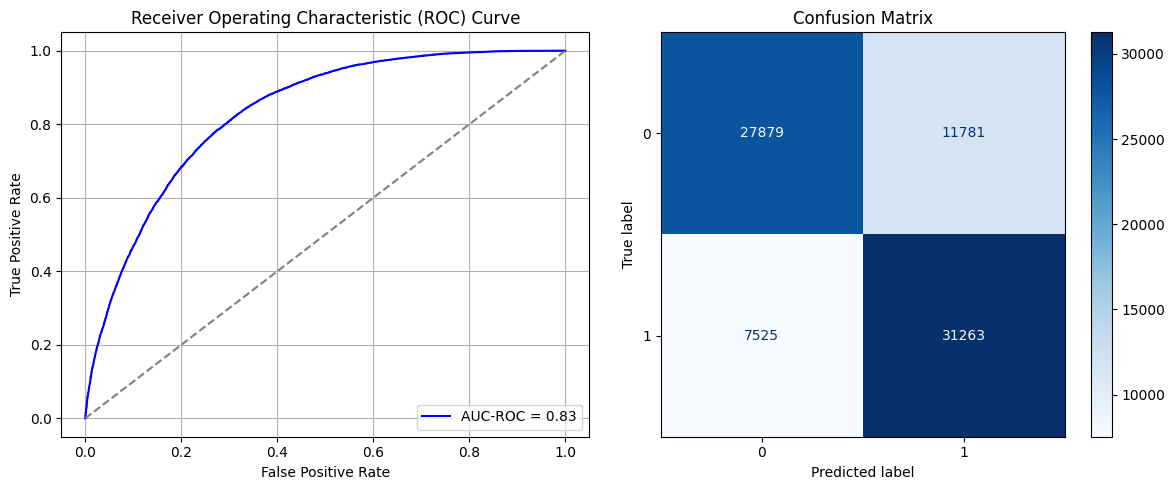

Best threshold based on F1-score: 0.40522098541259766
Time elapsed (performance): 234.5559237009993


In [163]:
train_and_evaluate(model_source_Sy_ROS, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
AUC-ROC: 0.7913397156046965
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80     23022
         1.0       0.20      0.78      0.32      2346

    accuracy                           0.69     25368
   macro avg       0.58      0.73      0.56     25368
weighted avg       0.90      0.69      0.75     25368

FPR 0.32208322474155154 TPR: 0.6779167752584485 FNR: 0.2186700767263427 TNR: 0.7813299232736572


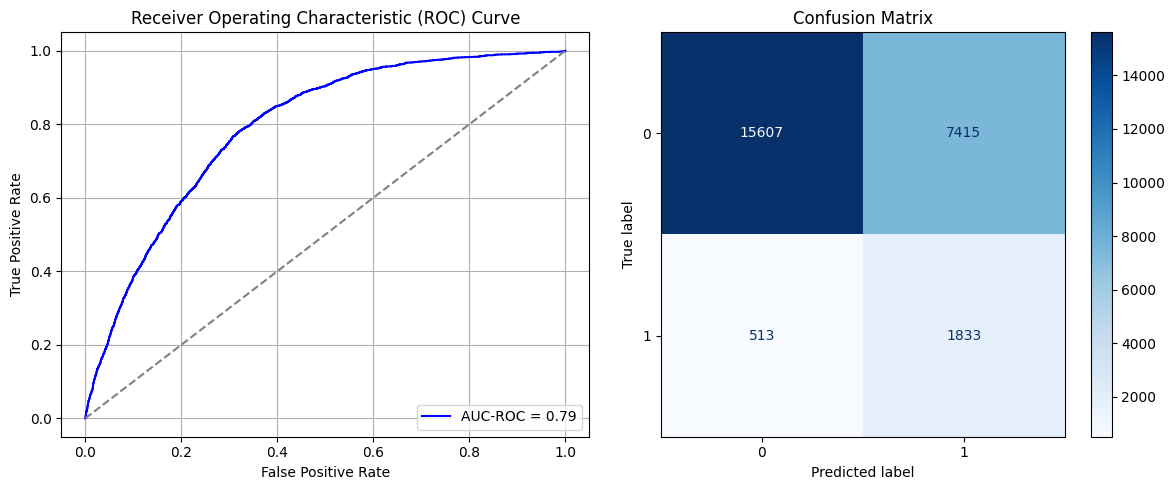

Best threshold based on F1-score: 0.6533725261688232
False Negative Rate: 0.2186700767263427
Time elapsed (performance): 1.9773927500000354


In [164]:
Transductive_TL(model_source_Sy_ROS, X_T_full, y_T_full, "Target")